# Neural Network for MNIST Data Set

#### Classify 10 Different Numbers without TensorFlow
In this NoteBook we will create a nerual network that can classify HandWriten Images in 10 different categories, first we will start by importing the libraries for using MNIST

MNIST is a Data set that is udes specifically for people that start right now with Machine Learning and Neural Network and want to build something without having to worry about data sets regularization of the data and in general the input of the algorithm

This dataset will provide 6000 images all of them with size $[28,28]$ 

## Importing the MNIST DataSet

In [1]:
import mnist
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

The next step is to use *mnist* in order to save in different variables the images and labels of the training and test sets.

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


You can show the images just by writing ***plt.imshow*** and then use the specific image with this command line ***train_images[5,:,:]***

Don't forget to show the results just by writing ***plt.show()***

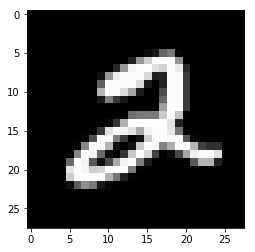

 The number in this image is  2


In [4]:
Index = 5

imgplot = plt.imshow(train_images[Index,:,:], cmap = 'gray')
plt.show()

print(" The number in this image is ", train_labels[Index])

It is really important to transform every image into a vector with $28*28 = 784$ features, this enable as to use this images - pixels as idividuals features that will be used as input in the Nueral Network

In [5]:
print(train_images.shape)
num_Imag = train_images.shape[0]
nH = train_images.shape[1]
nW = train_images.shape[2]
Tr_Im = train_images.reshape((num_Imag,nH*nW))
Tr_Im = np.transpose(Tr_Im)
Tr_lab = train_labels
print(Tr_Im.shape)

#=============Parameters===================
Batch = 500
m=Batch
lambda1 = 1
#=============Parameters===================

(60000, 28, 28)
(784, 60000)


## We need to Change Y ( train_labels) from Hot-Vector to Binary representation 

Example of a Hot Vector:
$$Y = [0,2,1,3]$$
Example of the Binary representation
$$ Y = 
\begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1\\
  \end{bmatrix} $$

In [6]:
def HotVector(targets,n_labels):
    Ytr = np.zeros((targets.shape[0], n_labels)) #empty one-hot matrix
    Ytr[np.arange(targets.shape[0]), targets] = 1 #set target idx to 1

    Ytr=np.transpose(Ytr)

    print(Ytr[:,0:5]) # We will show only the first 5 results

    print(Ytr.shape)
    return Ytr

In [7]:
n_labels = 10 # How many labels we have (10 different numbers)


targets = train_labels
print(targets[0:5]) # We will show only the first 5 results
print(targets.shape)
Ytr = HotVector(targets,n_labels)


[5 0 4 1 9]
(60000,)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
(10, 60000)


### Activation Function - Sigmoid 
It is really important to apply non-linearity (or else activation function) to the result *Z*, this is happening for several reasons but the important part is what activation function will be used
Two classical ones are Sigmoid and ReLU and in this particular example will be used the Sigmoid function

$$ a = \frac{1}{1+\exp^{-z}}$$
<img src = "img/Sigmoid.png" style="width:350;height:250px;">



In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [27]:
def Conv_One_step(ImagePiece,Filter,b):
    temp = np.multiply(Filter,ImagePiece) + b
    
    Res = np.sum(temp)
    
    return Res

In [28]:
def Conv_forward(Image,W,b):

    stride = 1
    pad = 0

    (f,f,n_C_prev,n_C) = W.shape
    
    (m,nH_prev,nW_prev,n_C_prev) = Image.shape
    
    
    n_H = int( (nH_prev+2*pad-f)/stride + 1)
    n_W = int( (nW_prev+2*pad-f)/stride + 1)
    
    Z = np.zeros((m,n_H,n_W,n_C))
    
    
    for i in range(m):
        img1 = Image[i,:,:,:]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    Z[i,h,w,c] = Conv_One_step(img1[h:h+f,w:w+f,:],W[:,:,:,c],b[:,:,:,c])
                    
    
    
    
        
    return Z

# BackPropagation
